# Arvores De Decisão

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
import tensorflow as tf
from subprocess import call

In [2]:
# Ler o ficheiro do dataset
df =pd.read_csv('C:/Users/Pedro/Desktop/IA/TP2/Dataset/divorce_data.csv', sep = ';')
df.head()


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
x = df.drop('Divorce',axis = 1)
y = df['Divorce'] 

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [5]:
DecisionTree_Class_Model = DecisionTreeClassifier()
DecisionTree_Class_Model.fit(x_train, y_train)

DecisionTreeClassifier()

In [6]:
y_prediction = DecisionTree_Class_Model.predict(x_test)
print("Prediction", y_prediction)

Prediction [0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1
 0 0 1 0 0 1 0 0 0 1 1 0 1 0]


In [7]:
accuracy = metrics.accuracy_score(y_test, y_prediction)
print("Acuracy:", accuracy)

Acuracy: 0.9019607843137255


In [8]:
pd.DataFrame(
    confusion_matrix(y_test, y_prediction),
    columns=['Predictions of Divorce', 'Predictions of No Divorce'],
    index=['Divorce', 'No Divorce']
)

,Predictions of Divorce,Predictions of No Divorce
Divorce,21,4
No Divorce,1,25


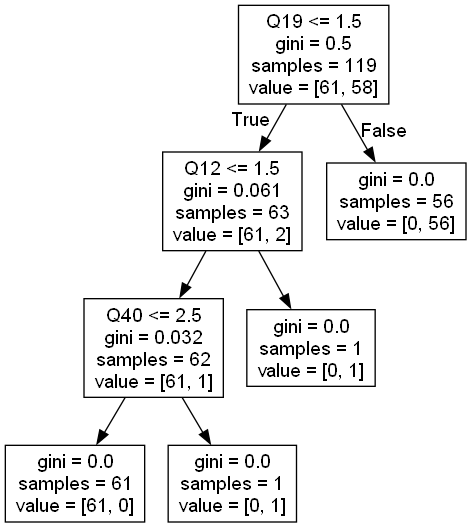

In [9]:
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

tree.export_graphviz(model, out_file='tree.dot', feature_names=x.columns)


call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

from IPython.display import Image
Image(filename = 'tree.png')

In [10]:
y_pred = DecisionTree_Class_Model.predict(x_test)
y_pred

##Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

##Matriz da confusão
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Previsão de Divórcio', 'Previsão de não Divórcio'],
    index=['Realidade de Divórcio', 'Realidade de não Divórcio']
)

0.9019607843137255


,Previsão de Divórcio,Previsão de não Divórcio
Realidade de Divórcio,21,4
Realidade de não Divórcio,1,25


In [14]:
##Guardar o modelo num ficheiro com o pickle
import pickle

filename = 'modelo_final.sav'
pickle.dump(model, open(filename, 'wb'))

In [15]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print("Score do Modelo:",result)

Score do Modelo: 0.8823529411764706


In [18]:
import pickle
loaded_model = pickle.load(open('./modelo_final.sav', 'rb'))    #Importar o modelo guardado

dNew =pd.read_csv('C:/Users/Pedro/Downloads/archive/divorce_data.csv', sep = ';')
dNew = dNew.drop('Divorce', axis=1)   #Remover a tabela Divórcio
dNew.head(2)     #Mostra as primeiras n linhas do conjunto de dados



,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2


In [19]:
##Guardar o modelo num ficheiro com pickle
import pickle

filename= 'modelo_final.sav'
pickle.dump(model, open(filename, 'wb'))

In [20]:
yNew = pd.Series(loaded_model.predict(dNew))
if yNew[0] == 0:
    print("NÂO Ocorre Divórcio: %s" % (yNew[0]))
else:
    print("Ocorre Divórcio: %s" % (yNew[0]))

Ocorre Divórcio: 1


In [21]:
Xnew = [0.3]
yNew = loaded_model.predict(dNew);
print("X=%s" %(yNew[0]))

X=1
